## Imports

In [1]:
import torch
nn = torch.nn
optim = torch.optim

import numpy as np
import matplotlib.pyplot as plt

## Define The Polynomial

In [2]:
def poly1(x) :
    """(x^4 + x^3 - 10x^2)/20"""
    
    return (torch.pow(x, 4) + torch.pow(x, 3) - 10*torch.square(x))/20

def add_noise(poly) :
    ln = len(poly)
    noise = torch.normal(0., 0.5, (ln, ))
    return poly + noise

def get_noisy_poly(poly, x) :
    # walrus operator magic
    return (p:=poly(x)) + add_noise(p)

# Interval

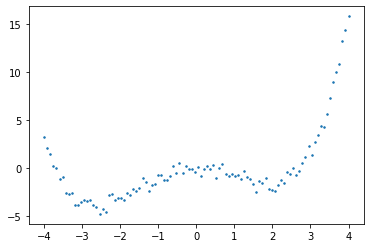

In [3]:
x = torch.linspace(-4, 4, 100)
target = get_noisy_poly(poly1, x)
plt.plot(x, target, 'o', markersize=1.5)

## Model

In [4]:
class Regress(nn.Module) :
    def __init__(self, degree=3) :
        torch.manual_seed(0)
        super().__init__() 
        self.degree = degree
        self.bias = nn.Parameter(torch.randn(size=(1,)))
        self.weights = nn.Parameter(torch.randn(size=(degree,)))
        
    def forward(self, x) :
        s = 0
        for w, d in zip(self.weights, range(1, self.degree+1)) :
            s += w*torch.pow(x, d)
        return s + self.bias

## Training Function

In [5]:
def train(model, inp, target, reg_type=None, lr=1e-3, iters=100, print_loss=False) :
    if reg_type is None :
        opt = optim.SGD(model.parameters(), lr=lr)
    else :
        reg_string, reg_dict = reg_type
        if reg_string == "L2" :
            print("Here")
            lamb = reg_dict["lambda"]
            opt = optim.SGD(model.parameters(), lr=lr, weight_decay=lamb)
        
    loss_func = nn.MSELoss()
    for i in range(iters) :
        opt.zero_grad()
        out = model(inp)
        loss = loss_func(out, target)
            
        if print_loss : print(f"Iter no {i+1} --> Loss = {loss}")
        loss.backward()
        opt.step()

## Initial prediction

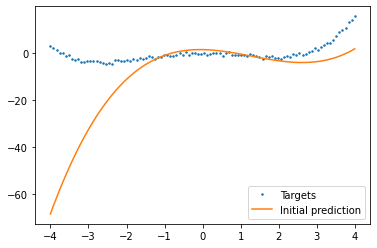

In [13]:
model = Regress()
model.eval()
out = model(x)
plt.plot(x, target, 'o', markersize=1.5, label='Targets')
plt.plot(x, out.detach().numpy(), label='Initial prediction')
plt.legend(loc='lower right')

## Train the model
Uncomment/Comment lines as necessary

In [14]:
model.train()

#####################################################################

# Train with simple MSE
# train(model, x, target)

# Train with MSE and L2 regularization
reg_type = (
    "L2", 
    {"lambda" : 1e-5}
)
train(model, x, target, reg_type)

#####################################################################

model.eval()

#####################################################################

# out_mse = model(x)
out_l2 = model(x)

Here


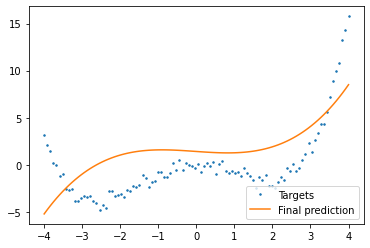

In [15]:
model.eval()
out = model(x)
plt.plot(x, target, 'o', markersize=1.5, label='Targets')
plt.plot(x, out.detach().numpy(), label='Final prediction')
plt.legend(loc='lower right')

## Compare Predictions

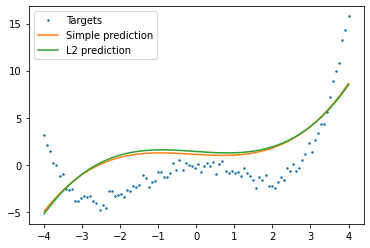

In [18]:
plt.plot(x, target, 'o', markersize=1.5, label='Targets')
plt.plot(x, out_mse.detach().numpy(), label='Simple prediction')
plt.plot(x, out_l2.detach().numpy(), label='L2 prediction')
plt.legend(loc='upper left')